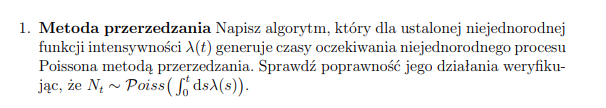

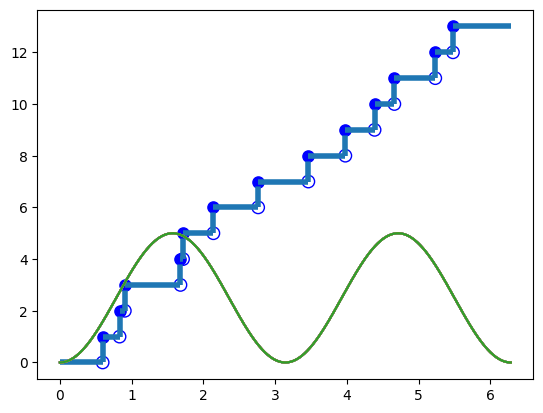

In [1]:
import numpy as np
import scipy
import matplotlib.pyplot as plt

def niejednorodny_proces_poissona(lambda_func, T):
    lambda2 = scipy.integrate.quad(lambda_func, 0, T)[0]
    k = np.random.poisson(lambda2)
    xs = np.linspace(0, T, 1000)
    M = max(lambda_func(xs))

    skoki = []

    while len(skoki) < k:
        ux = np.random.uniform(0, T)
        uy = np.random.uniform(0, M)
        if uy < lambda_func(ux):
            skoki.append(ux)
            continue
        else:
            continue

    skoki.sort()
    return skoki

lambda1 = lambda t: 5*np.sin(t)**2
T = 2*np.pi
skoki = niejednorodny_proces_poissona(lambda1, T)

def rysowanie_procesu_poissona(T, skoki, lambda_func):
    x_i = [0]
    y_i = [0]
    xs = np.linspace(0, T, 1000)
    for i in range(len(skoki)):
        x_i.append(skoki[i])
        y_i.append(y_i[-1] + 1)

        plt.vlines(x=x_i[-1], ymin=y_i[-1] - 1, ymax=y_i[-1], linestyles='dashed', linewidth=4)
        plt.hlines(y=y_i[-2], xmin=x_i[-2], xmax=x_i[-1], linewidth=4)
        plt.scatter(x=[x_i[-1]], y=[y_i[-2]], facecolors='none', edgecolors='b', s=80)
        plt.scatter(x=[x_i[-1]], y=[y_i[-1]], c='b', s=65)
        plt.plot(xs, lambda_func(xs))

    plt.hlines(y=y_i[-1], xmin=x_i[-1], xmax=T, linewidth=4)

    plt.show()
rysowanie_procesu_poissona(T, skoki, lambda1)

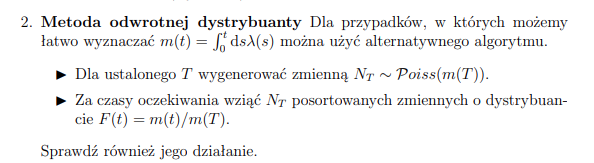

In [4]:
from scipy.interpolate import interp1d
T1 = 2*np.pi
lambda_func = lambda t: 5*np.sin(t)**2
n = 1000 #liczba punktów do szacowania funkcji odwrotnej

def niejednorodny_p_pois_odwrotna_dys(lambda_func, T, n):
    m_T = scipy.integrate.quad(lambda_func, 0, T)[0]
    N_t = np.random.poisson(m_T)
    ts = np.linspace(0,T1,n)
    m_values = [scipy.integrate.quad(lambda_func, 0, t)[0] for t in ts]
    m_inv = interp1d(m_values, ts)
    Ts = np.zeros(N_t)
    for i in range(N_t):
        u = np.random.rand()
        Ts[i] = m_inv(m_T * u)
    Ts.sort()
    return Ts



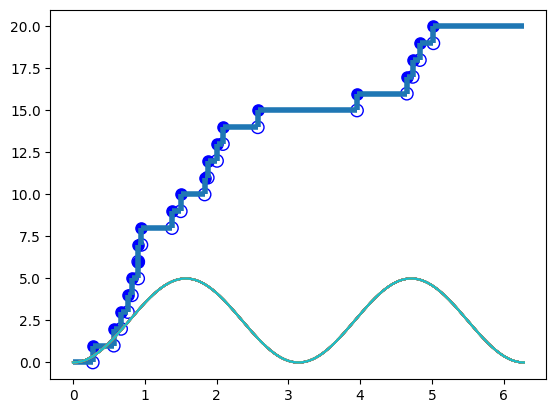

In [91]:
Ts = niejednorodny_p_pois_odwrotna_dys(lambda_func, T1,n)
rysowanie_procesu_poissona(T1, Ts, lambda_func)

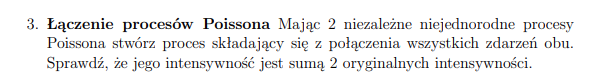

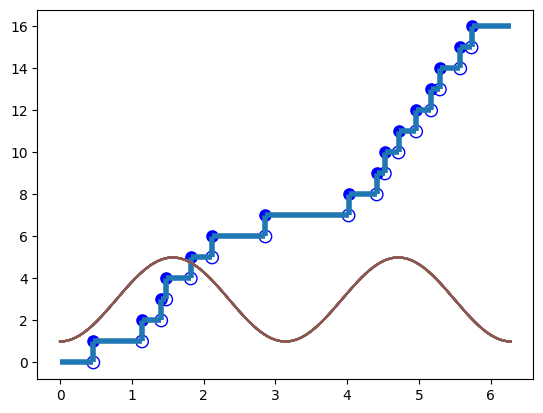

In [93]:
lambda_func1 = lambda t: 5*np.sin(t)**2
lambda_func2 = lambda t: np.cos(t)**2
T_1, T_2 = 2*np.pi, 2*np.pi
Ts1, Ts2 = niejednorodny_p_pois_odwrotna_dys(lambda_func1, T_1, n), niejednorodny_p_pois_odwrotna_dys(lambda_func2, T_2, n)
Ts12 = list(Ts1) + list(Ts2)
lambda_12 = lambda t: lambda_func1(t) + lambda_func2(t)
Ts12.sort()
rysowanie_procesu_poissona(max(T_1, T_2), Ts12, lambda_12)


Zadanie 4

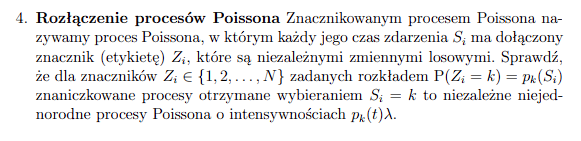

In [10]:
lambda_4 = 2
def p_k(k, t):
    return 1/2**k * np.exp(-t/k)
n_znacznikow = 10
n_4 = 1000
lambda_func_4 = lambda t: 1
T_4 = 5
S_n = np.cumsum(niejednorodny_p_pois_odwrotna_dys(lambda_func_4, T_4, n_4))
znaczniki = []

def generowanie_znaczników(n, k):
    u = np.random.rand(n)
    return k * np.log(1/(2**k * u))

for S in S_n:
    znaczniki.append([generowanie_znaczników(1, k)[0] for k in range(n_znacznikow)])

znaczniki_k = []
for i in range(n_znacznikow):
    z = []
    for znacznik in znaczniki:
        z.append(znacznik[i])
    znaczniki_k.append(z)
print(znaczniki_k)

[[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.21155526285047938, 0.5044235025910118, -0.12451800327724706, 0.41993069127497495, -0.05113794464753534, -0.4053586419969293, -0.5841020601919413, 0.10292744362522269, -0.5539670007696963], [-2.5940027848077523, -1.6385025960183583, -2.545529773810526, -2.234015455606597, -2.698189912022055, -0.838789383205018, -1.625542853519405, 0.6167626829255813, -1.1526592367399604], [-5.703693662988964, -6.140545525274083, -3.467727023012321, -6.109033876161348, 0.5227976052943244, 0.2451364436209833, 3.8778532018671, -5.042634321152633, -5.118681098660556], [-9.693402918720906, 2.0137051161168, -2.8191430575023175, -7.630203426435982, 5.835613072691434, 9.02232142016048, -6.089863670000581, -4.697557253560163, 2.626586343032761], [-4.716997860985559, -11.501386949845635, -17.114756492639216, -14.897040472185946, -11.07174555090034, -13.406906790460997, -16.126854566844305, -10.17551229617177, -12.25006291259777], [-22.907429419751857, -13.6078961